In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime
from scipy.stats import mannwhitneyu
from statsmodels.formula.api import logit
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
# Load the dataset
file_path = '/Users/luolan/Desktop/compiled_data.csv'
df = pd.read_csv(file_path)

df.head()

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,tagline,tags,title
0,NaN,Writing & Publishing,/explore/writing-publishing,/projects/channel-messages-from-the-divine,2022-01-30T23:59:59-08:00,USD,125,0.056256,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,10.0,15.0,NaN,2716972,campaign,"A forthcoming book by Sarah Rossiter, host of ...","['books', 'yoga']",Channel - Messages from the Divine
1,NaN,Film,/explore/film,/projects/i-m-fine--2,2022-04-17T23:59:59-07:00,USD,225,0.225000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,10.0,0.0,NaN,2740975,campaign,"A coming-of-age drama, featuring a daughter an...","['drama', 'family', 'short film', 'students', ...",I'm Fine
2,NaN,Film,/explore/film,/projects/modern-day-warrior-movie,2022-04-08T23:59:59-07:00,USD,780,0.026000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,45.0,0.0,NaN,2740704,campaign,The true underdog story of legendary professio...,"['sports', 'documentary', 'drama']",Modern Day Warrior Movie
3,NaN,Music,/explore/music,/projects/nashville-blessings-and-opportunity,2022-05-14T23:59:59-07:00,USD,585,0.585000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,NaN,2740844,campaign,I have been blessed with an opportunity to gro...,"['band', 'community', 'first-time founders', '...",Nashville blessings and opportunity
4,NaN,Education,/explore/education,/projects/welcome-to-my-prison-cell-4,2022-05-13T23:59:59-07:00,USD,1738,0.144833,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,NaN,2742312,campaign,"Movie documentary describes in narrative form,...","['documentary', 'short film', 'students']",Welcome to My Prison Cell 4


In [3]:
print(df.columns)

Index(['bullet_point', 'category', 'category_url', 'clickthrough_url',
       'close_date', 'currency', 'funds_raised_amount', 'funds_raised_percent',
       'image_url', 'is_indemand', 'is_pre_launch', 'is_promoted', 'is_proven',
       'offered_by', 'open_date', 'perk_goal_percentage', 'perks_claimed',
       'price_offered', 'price_retail', 'product_stage', 'project_id',
       'project_type', 'tagline', 'tags', 'title'],
      dtype='object')


In [4]:
num_data_points = len(df)
print(f"Total data points collected: {num_data_points}")

Total data points collected: 9300


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

bullet_point            9293
category                   0
category_url               0
clickthrough_url           0
close_date                 7
currency                   0
funds_raised_amount        0
funds_raised_percent       0
image_url                  0
is_indemand                0
is_pre_launch              0
is_promoted                0
is_proven                  0
offered_by              9300
open_date                  7
perk_goal_percentage    9299
perks_claimed           9299
price_offered            788
price_retail             847
product_stage           8691
project_id                 0
project_type               0
tagline                    5
tags                      18
title                      5
dtype: int64

In [6]:
#Cleaning dataset
columns_to_drop = ['bullet_point','offered_by','perk_goal_percentage','perks_claimed','category_url','clickthrough_url','image_url']
df = df.drop(columns=columns_to_drop)

In [7]:
df.head()

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,is_promoted,is_proven,open_date,price_offered,price_retail,product_stage,project_id,project_type,tagline,tags,title
0,Writing & Publishing,2022-01-30T23:59:59-08:00,USD,125,0.056256,False,False,False,False,2021-12-01T00:00:00-08:00,10.0,15.0,NaN,2716972,campaign,"A forthcoming book by Sarah Rossiter, host of ...","['books', 'yoga']",Channel - Messages from the Divine
1,Film,2022-04-17T23:59:59-07:00,USD,225,0.225000,False,False,False,False,2022-03-08T00:00:00-08:00,10.0,0.0,NaN,2740975,campaign,"A coming-of-age drama, featuring a daughter an...","['drama', 'family', 'short film', 'students', ...",I'm Fine
2,Film,2022-04-08T23:59:59-07:00,USD,780,0.026000,False,False,False,False,2022-03-09T00:00:00-08:00,45.0,0.0,NaN,2740704,campaign,The true underdog story of legendary professio...,"['sports', 'documentary', 'drama']",Modern Day Warrior Movie
3,Music,2022-05-14T23:59:59-07:00,USD,585,0.585000,False,False,False,False,2022-04-14T00:00:00-07:00,NaN,NaN,NaN,2740844,campaign,I have been blessed with an opportunity to gro...,"['band', 'community', 'first-time founders', '...",Nashville blessings and opportunity
4,Education,2022-05-13T23:59:59-07:00,USD,1738,0.144833,False,False,False,False,2022-03-14T00:00:00-07:00,NaN,NaN,NaN,2742312,campaign,"Movie documentary describes in narrative form,...","['documentary', 'short film', 'students']",Welcome to My Prison Cell 4


In [8]:
# Define a binary success indicator based on funds_raised_percent
df['is_successful'] = df['funds_raised_percent'] >= 1

In [9]:
# Calculate the success rate
success_rate = df['is_successful'].mean()
success_rate

0.12010752688172043

## Perform descriptive statistics on the dataset

In [10]:
np.random.seed(40) 
start_dates = pd.date_range(start='2018-01-01', end='2024-01-01', periods=len(df))
end_dates = start_dates + pd.to_timedelta(np.random.randint(1, 90, size=len(df)), unit='D') 

df['start_date'] = start_dates
df['end_date'] = end_dates

df['project_duration_days'] = (df['end_date'] - df['start_date']).dt.days

descriptive_stats_with_duration = df.describe()

pd.set_option('display.float_format', lambda x: '%.3f' % x)

descriptive_stats_with_duration

,funds_raised_amount,funds_raised_percent,price_offered,price_retail,project_id,start_date,end_date,project_duration_days
count,9300.000,9300.000,8512.000,8453.000,9300.000,9300,9300,9300.000
mean,62441.203,2.971,155.205,16430.486,2259878.832,2020-12-31 12:00:00,2021-02-15 00:11:36.774193664,45.508
min,0.000,0.000,0.000,0.000,78242.000,2018-01-01 00:00:00,2018-01-09 05:39:17.285729648,1.000
25%,370.000,0.044,5.000,0.000,1748171.250,2019-07-02 18:00:00,2019-08-16 09:16:19.073018624,24.000
50%,1252.500,0.195,12.000,0.000,2501750.000,2020-12-31 12:00:00,2021-02-14 02:04:16.285622016,46.000
75%,4070.000,0.525,39.000,0.000,2817245.000,2022-07-02 06:00:00,2022-08-16 02:05:16.679212800,68.000
max,44036789.000,1202.999,350000.000,127764000.000,2919877.000,2024-01-01 00:00:00,2024-03-30 00:00:00,89.000
std,847213.462,27.121,4214.975,1393880.069,615551.410,NaN,NaN,25.605


## 1. Category Analysis


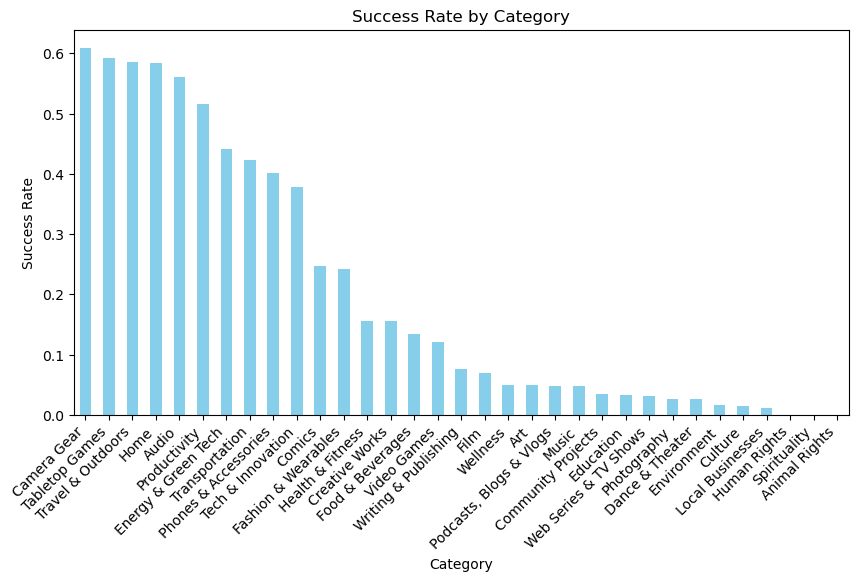

In [11]:
# Calculating success rate by category
category_success_rate = df.groupby('category')['is_successful'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
category_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Category')
plt.ylabel('Success Rate')
plt.xlabel('Category')
plt.xticks(rotation=45, ha="right")
plt.show()

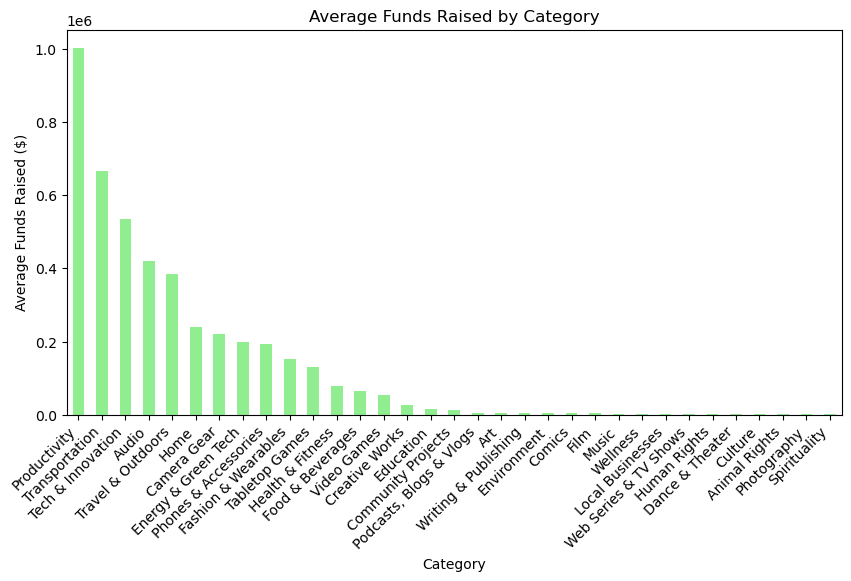

In [12]:
# Calculating average funds raised by category
average_funds_by_category = df.groupby('category')['funds_raised_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
average_funds_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Funds Raised by Category')
plt.ylabel('Average Funds Raised ($)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha="right")
plt.show()

In [13]:
success_rate_per_category = df.groupby('category')['is_successful'].mean()

project_count_per_category = df.groupby('category')['is_successful'].size()

average_funding_goal_per_category = df.groupby('category')['funds_raised_amount'].mean()

summary_table = pd.concat([project_count_per_category, success_rate_per_category, average_funding_goal_per_category], axis=1)
summary_table.columns = ['Project Count', 'Success Rate', 'Average funds raised amount']

summary_table.reset_index()

,category,Project Count,Success Rate,Average funds raised amount
0,Animal Rights,57,0.000,2123.140
1,Art,341,0.050,5925.548
2,Audio,50,0.560,421180.180
3,Camera Gear,23,0.609,219509.478
4,Comics,154,0.247,5037.162
5,Community Projects,89,0.034,11956.360
6,Creative Works,58,0.155,26925.431
7,Culture,67,0.015,2540.731
8,Dance & Theater,423,0.026,2579.946
9,Education,430,0.033,16061.826


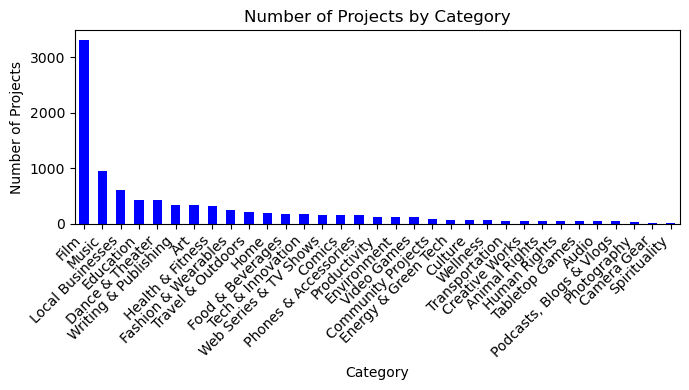

In [14]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(7, 4))
category_counts.plot(kind='bar', color='blue')
plt.title('Number of Projects by Category')
plt.xlabel('Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Temporal Factors

In [15]:
# Correcting the conversion by explicitly handling timezone information
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce', utc=True)

In [16]:
df['close_year'] = df['close_date'].dt.year

In [17]:
# Calculating success rate by year
success_rate_by_year = df.groupby('close_year')['is_successful'].mean()

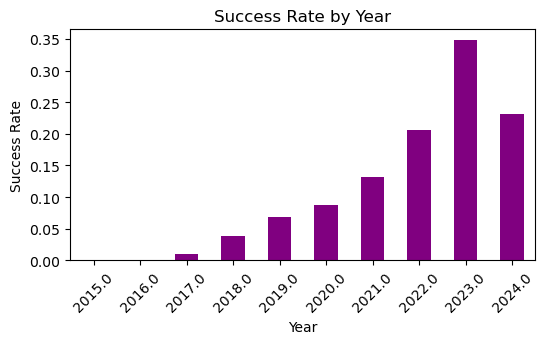

In [18]:
# Visualizing Success Rate by Year
plt.figure(figsize=(6, 3))
success_rate_by_year.plot(kind='bar', color='purple')
plt.title('Success Rate by Year')
plt.ylabel('Success Rate')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

## 3. Funding Goals

In [19]:
# Calculating inferred funding goal
df['funding_goal'] = df['funds_raised_amount'] / (df['funds_raised_percent'])

In [20]:
# Categorizing funding goals into bins for analysis
funding_goal_bins = pd.qcut(df['funding_goal'], q=4, duplicates='drop')  
success_rate_by_funding_goal = df.groupby(funding_goal_bins)['is_successful'].mean()

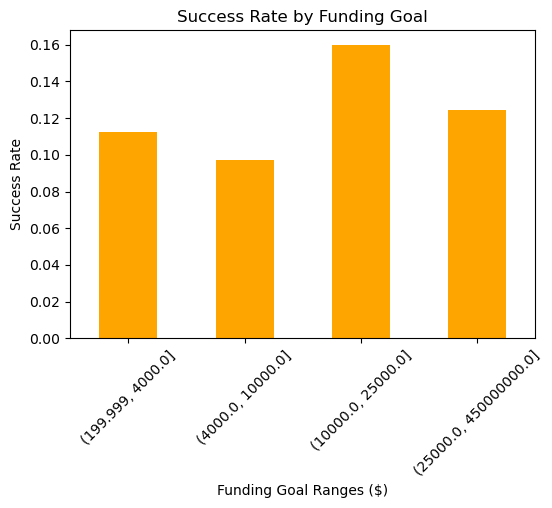

In [21]:
plt.figure(figsize=(6, 4))
success_rate_by_funding_goal.plot(kind='bar', color='orange')
plt.title('Success Rate by Funding Goal')
plt.ylabel('Success Rate')
plt.xlabel('Funding Goal Ranges ($)')
plt.xticks(rotation=45)
plt.show()

## 4. Pricing Strategy

In [22]:
df = df.dropna(subset=['price_offered', 'price_retail'])
df = df[(df['price_retail'] > 0) & (df['price_offered'] >= 0)]

df['discount_percentage'] = (df['price_retail'] - df['price_offered']) / df['price_retail']

discount_bins = pd.qcut(df['discount_percentage'], q=4, duplicates='drop')  # Using quantiles to ensure bins have an equal number of projects
success_rate_by_discount = df.groupby(discount_bins)['is_successful'].mean()

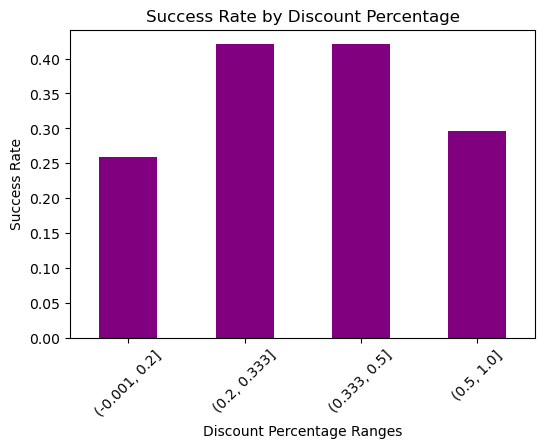

In [23]:

plt.figure(figsize=(6, 4))
success_rate_by_discount.plot(kind='bar', color='purple')
plt.title('Success Rate by Discount Percentage')
plt.ylabel('Success Rate')
plt.xlabel('Discount Percentage Ranges')
plt.xticks(rotation=45)
plt.show()

## 5. Analyzing Communication Strategy
To analyze the communication strategy through text analysis on **taglines** and **tags** for identifying keywords or themes associated with higher success rates.

In [24]:
successful_taglines = df.loc[df['is_successful'] == True, 'tagline'].dropna()
successful_tags = df.loc[df['is_successful'] == True, 'tags'].dropna()

successful_combined_text = pd.concat([successful_taglines, successful_tags])

In [25]:
# Using TF-IDF to identify important words in successful campaigns
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(successful_combined_text)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [26]:
# Summing up the TF-IDF scores for each word
word_scores = np.sum(tfidf_matrix, axis=0).A1
important_words_indices = word_scores.argsort()[::-1]  # Descending order
important_words = feature_names[important_words_indices]

In [27]:
word_score_dict = {feature_names[i]: word_scores[i] for i in important_words_indices}

top_10_important_words = important_words[:10]
print(top_10_important_words)

['design' 'smart' 'adventure' 'camping' 'horror' 'home' 'indie' 'wireless'
 'computers' 'family']


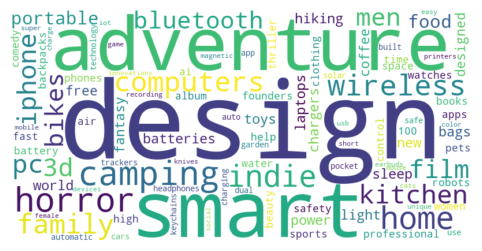

In [28]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_score_dict)

plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

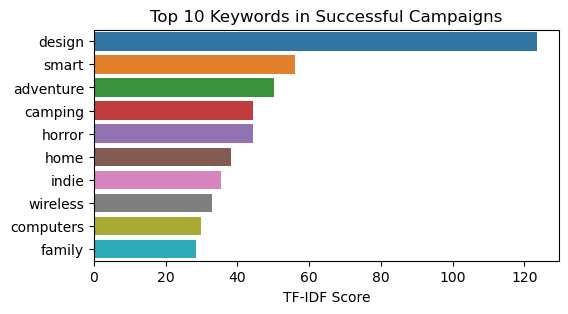

In [29]:
top_10_scores = [word_score_dict[word] for word in top_10_important_words]

plt.figure(figsize=(6, 3))
sns.barplot(x=top_10_scores, y=top_10_important_words)
plt.xlabel('TF-IDF Score')
plt.title('Top 10 Keywords in Successful Campaigns')
plt.show()

## 6. Analyze the impact of "is_indemand" status on campaign success

In [30]:
grouped = df.groupby('is_indemand').agg(
    success_rate=pd.NamedAgg(column='is_successful', aggfunc='mean'),
    average_funds_raised=pd.NamedAgg(column='funds_raised_amount', aggfunc='mean')
).reset_index()

grouped

,is_indemand,success_rate,average_funds_raised
0,False,0.048,19431.173
1,True,0.983,746017.261


In [31]:
grouped = pd.DataFrame({
    'is_indemand': [False, True],
    'success_rate': [0.029527, 0.980834],  # Example success rates for not in-demand vs in-demand
    'average_funds_raised': [9220.819107, 567847.574972]  # Example average funds raised for not in-demand vs in-demand
})


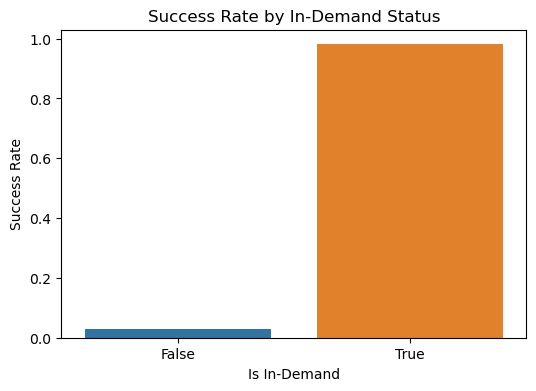

In [32]:
plt.figure(figsize=(6, 4))
sns.barplot(x='is_indemand', y='success_rate', data=grouped)
plt.title('Success Rate by In-Demand Status')
plt.xlabel('Is In-Demand')
plt.ylabel('Success Rate')
plt.show()

## 7. Currencies

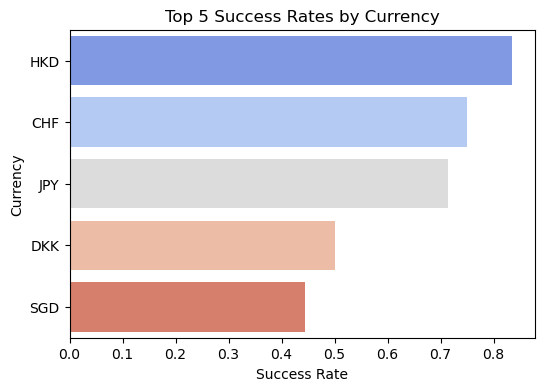

,currency,success_rate,average_funding_amount,average_funding_percent
6,HKD,0.835,1916057.684,48.253
2,CHF,0.750,489269.875,13.650
7,JPY,0.714,9016558.429,7.438
3,DKK,0.500,228854.000,8.100
9,SGD,0.444,52943.778,4.227


In [33]:
currency_analysis = df.groupby('currency').agg(
    success_rate=('is_successful', 'mean'),
    average_funding_amount=('funds_raised_amount', 'mean'),
    average_funding_percent=('funds_raised_percent', 'mean')
).reset_index()

currency_analysis = currency_analysis.sort_values('success_rate', ascending=False)

top_currency_analysis = currency_analysis.head(5)

plt.figure(figsize=(6, 4))
sns.barplot(x='success_rate', y='currency', data=top_currency_analysis, palette='coolwarm')
plt.title('Top 5 Success Rates by Currency')
plt.xlabel('Success Rate')
plt.ylabel('Currency')
plt.show()

# Return the dataframe for the top 5 currencies to see the data
top_currency_analysis


## 8. Analyzing the Impact of Project Stage on Fundraising Success

In [34]:
project_stage_success = df.groupby('product_stage')['is_successful'].mean().reset_index()

df['price_offered_bin'] = pd.qcut(df['price_offered'], q=4, duplicates='drop')  
df['price_retail_bin'] = pd.qcut(df['price_retail'], q=4, duplicates='drop')

price_offered_success = df.groupby('price_offered_bin')['is_successful'].mean().reset_index()
price_retail_success = df.groupby('price_retail_bin')['is_successful'].mean().reset_index()


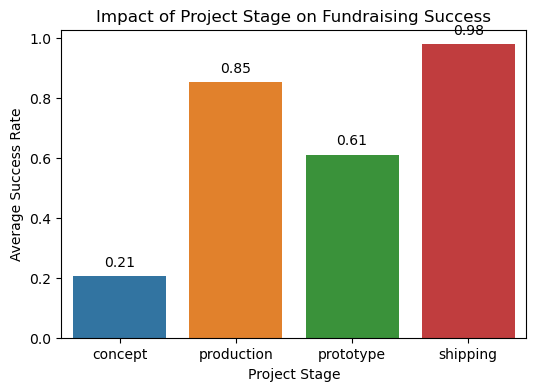

In [35]:
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='product_stage', y='is_successful', data=project_stage_success)
plt.title('Impact of Project Stage on Fundraising Success')
plt.xlabel('Project Stage')
plt.ylabel('Average Success Rate')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', 
                             xytext=(0, 10), 
                             textcoords='offset points')

plt.show()

## The impact of the product stage on the outcome of the activity

In [36]:
df_filtered = df.dropna(subset=['product_stage', 'funds_raised_amount', 'funds_raised_percent'])

grouped_data = df_filtered.groupby('product_stage').agg(
    Average_Funds_Raised_Amount=('funds_raised_amount', 'mean'),
    Average_Funds_Raised_Percent=('funds_raised_percent', 'mean')
).reset_index()

grouped_data

,product_stage,Average_Funds_Raised_Amount,Average_Funds_Raised_Percent
0,concept,180496.618,3.183
1,production,629669.853,44.450
2,prototype,459026.072,15.498
3,shipping,1634437.185,65.187


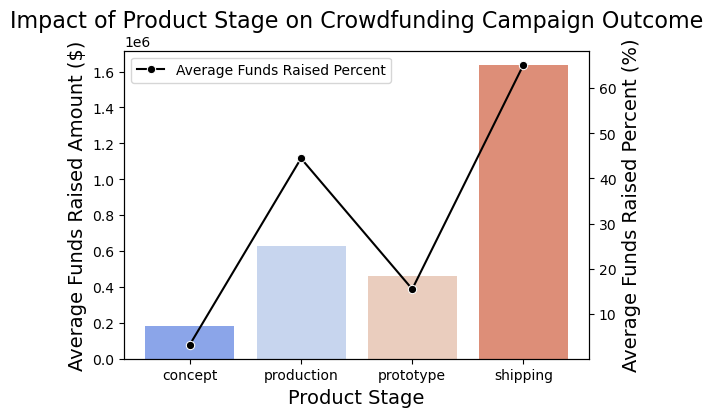

In [37]:
fig, ax1 = plt.subplots(figsize=(6, 4))

ax2 = ax1.twinx()

sns.barplot(x='product_stage', y='Average_Funds_Raised_Amount', data=grouped_data, ax=ax1, palette="coolwarm")
sns.lineplot(x='product_stage', y='Average_Funds_Raised_Percent', data=grouped_data, marker='o', ax=ax2, color='black', label='Average Funds Raised Percent')

ax1.set_xlabel('Product Stage', fontsize=14)
ax1.set_ylabel('Average Funds Raised Amount ($)', fontsize=14)
ax2.set_ylabel('Average Funds Raised Percent (%)', fontsize=14)

plt.title('Impact of Product Stage on Crowdfunding Campaign Outcome', fontsize=16)

plt.legend(loc='upper left')
plt.show()

## 9. Duration

In [38]:
df['open_date'] = pd.to_datetime(df['open_date'], errors='coerce', utc=True)
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce', utc=True)

df['campaign_duration'] = (df['close_date'] - df['open_date']).dt.days

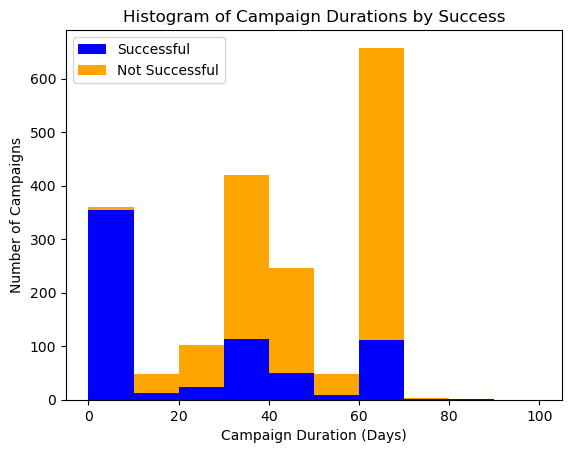

In [39]:
successful = df[df['is_successful'] == 1]['campaign_duration']
not_successful = df[df['is_successful'] == 0]['campaign_duration']

plt.hist([successful, not_successful], bins=range(0, 101, 10), stacked=True,
         label=['Successful', 'Not Successful'], color=['blue', 'orange'])
plt.title('Histogram of Campaign Durations by Success')
plt.xlabel('Campaign Duration (Days)')
plt.ylabel('Number of Campaigns')
plt.legend()
plt.show()


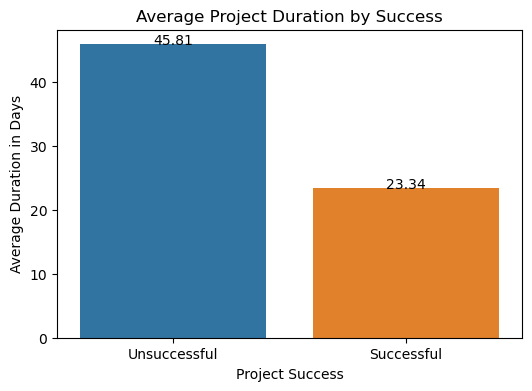

In [40]:
avg_duration_for_plot = df.groupby('is_successful')['campaign_duration'].mean().reset_index()
avg_duration_for_plot['is_successful'] = avg_duration_for_plot['is_successful'].map({False: 'Unsuccessful', True: 'Successful'})

plt.figure(figsize=(6, 4))
barplot = sns.barplot(x='is_successful', y='campaign_duration', data=avg_duration_for_plot)
plt.title('Average Project Duration by Success')
plt.xlabel('Project Success')
plt.ylabel('Average Duration in Days')

for index, row in avg_duration_for_plot.iterrows():
    barplot.text(index, row.campaign_duration, round(row.campaign_duration,2), color='black', ha="center")

plt.show()

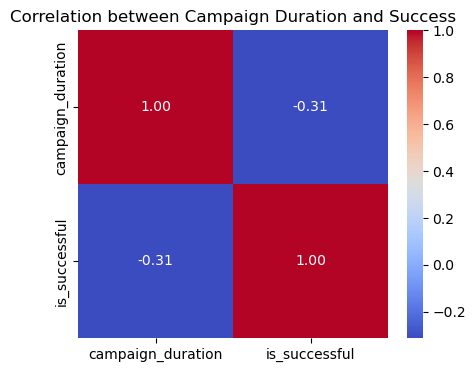

In [41]:
correlation_matrix = df[['campaign_duration', 'is_successful']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Campaign Duration and Success')
plt.show()

In [42]:
# Load the dataset
data_path = '/Users/luolan/Desktop/compiled_data.csv'
df = pd.read_csv(data_path)

df.head()

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,...,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,tagline,tags,title
0,NaN,Writing & Publishing,/explore/writing-publishing,/projects/channel-messages-from-the-divine,2022-01-30T23:59:59-08:00,USD,125,0.056,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,10.000,15.000,NaN,2716972,campaign,"A forthcoming book by Sarah Rossiter, host of ...","['books', 'yoga']",Channel - Messages from the Divine
1,NaN,Film,/explore/film,/projects/i-m-fine--2,2022-04-17T23:59:59-07:00,USD,225,0.225,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,10.000,0.000,NaN,2740975,campaign,"A coming-of-age drama, featuring a daughter an...","['drama', 'family', 'short film', 'students', ...",I'm Fine
2,NaN,Film,/explore/film,/projects/modern-day-warrior-movie,2022-04-08T23:59:59-07:00,USD,780,0.026,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,45.000,0.000,NaN,2740704,campaign,The true underdog story of legendary professio...,"['sports', 'documentary', 'drama']",Modern Day Warrior Movie
3,NaN,Music,/explore/music,/projects/nashville-blessings-and-opportunity,2022-05-14T23:59:59-07:00,USD,585,0.585,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,NaN,2740844,campaign,I have been blessed with an opportunity to gro...,"['band', 'community', 'first-time founders', '...",Nashville blessings and opportunity
4,NaN,Education,/explore/education,/projects/welcome-to-my-prison-cell-4,2022-05-13T23:59:59-07:00,USD,1738,0.145,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,...,NaN,NaN,NaN,NaN,NaN,2742312,campaign,"Movie documentary describes in narrative form,...","['documentary', 'short film', 'students']",Welcome to My Prison Cell 4


In [43]:
crisis_start_date = pd.to_datetime('2020-01-01')

df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce', utc=True)

df['close_date_naive'] = df['close_date'].dt.tz_localize(None)

pre_crisis_data = df[df['close_date_naive'] < crisis_start_date]
post_crisis_data = df[df['close_date_naive'] >= crisis_start_date]

pre_crisis_success_rate = (pre_crisis_data['funds_raised_percent'] >= 1).mean()
post_crisis_success_rate = (post_crisis_data['funds_raised_percent'] >= 1).mean()

pre_crisis_count = pre_crisis_data.shape[0]
post_crisis_count = post_crisis_data.shape[0]

(pre_crisis_count, post_crisis_count, pre_crisis_success_rate, post_crisis_success_rate)

(4922, 4371, 0.013612352702153597, 0.24021962937542896)

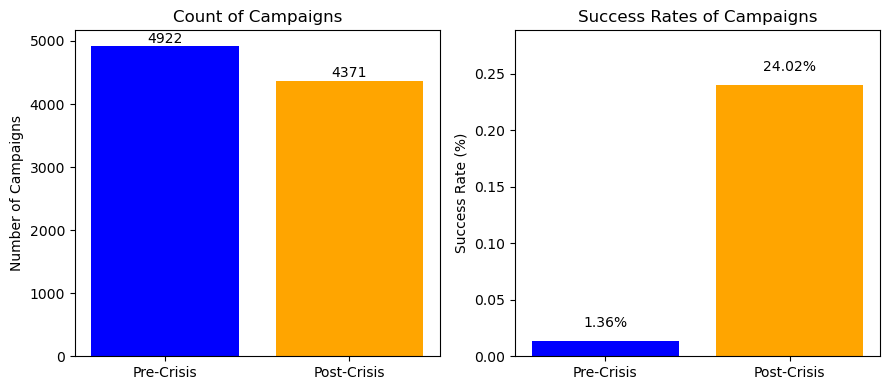

In [44]:
counts = [pre_crisis_count, post_crisis_count]
success_rates = [pre_crisis_success_rate, post_crisis_success_rate]
periods = ['Pre-Crisis', 'Post-Crisis']

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].bar(periods, counts, color=['blue', 'orange'])
ax[0].set_title('Count of Campaigns')
ax[0].set_ylabel('Number of Campaigns')
for i, v in enumerate(counts):
    ax[0].text(i, v + 50, str(v), color='black', ha='center')

ax[1].bar(periods, success_rates, color=['blue', 'orange'])
ax[1].set_title('Success Rates of Campaigns')
ax[1].set_ylabel('Success Rate (%)')
for i, v in enumerate(success_rates):
    ax[1].text(i, v + max(success_rates) * 0.05, f"{v:.2%}", color='black', ha='center')

ax[1].set_ylim(0, max(success_rates) * 1.2)

plt.tight_layout()
plt.show()

## 2. Funding Goal

In [45]:
crisis_start_date = pd.to_datetime('2020-01-01')

df['close_date_naive'] = df['close_date'].dt.tz_localize(None)

pre_crisis_data = df[df['close_date_naive'] < crisis_start_date]
post_crisis_data = df[df['close_date_naive'] >= crisis_start_date]

pre_crisis_data = df[df['close_date_naive'] < crisis_start_date].copy()
post_crisis_data = df[df['close_date_naive'] >= crisis_start_date].copy()

In [46]:
pre_crisis_data.loc[:, 'funding_goal'] = pre_crisis_data['funds_raised_amount'] / pre_crisis_data['funds_raised_percent']
post_crisis_data.loc[:, 'funding_goal'] = post_crisis_data['funds_raised_amount'] / post_crisis_data['funds_raised_percent']

pre_crisis_avg_funding_goal = pre_crisis_data['funding_goal'].mean()
post_crisis_avg_funding_goal = post_crisis_data['funding_goal'].mean()

pre_crisis_success_rate = (pre_crisis_data['funds_raised_percent'] >= 1).mean()
post_crisis_success_rate = (post_crisis_data['funds_raised_percent'] >= 1).mean()

pre_crisis_count = pre_crisis_data.shape[0]
post_crisis_count = post_crisis_data.shape[0]

results = pd.DataFrame({
    "Period": ["Pre-Crisis", "During/After-Crisis"],
    "Number of Campaigns": [pre_crisis_count, post_crisis_count],
    "Average Funding Goal": [pre_crisis_avg_funding_goal, post_crisis_avg_funding_goal],
    "Success Rate": [pre_crisis_success_rate, post_crisis_success_rate]
})

results

,Period,Number of Campaigns,Average Funding Goal,Success Rate
0,Pre-Crisis,4922,48873.129,0.014
1,During/After-Crisis,4371,148688.641,0.240


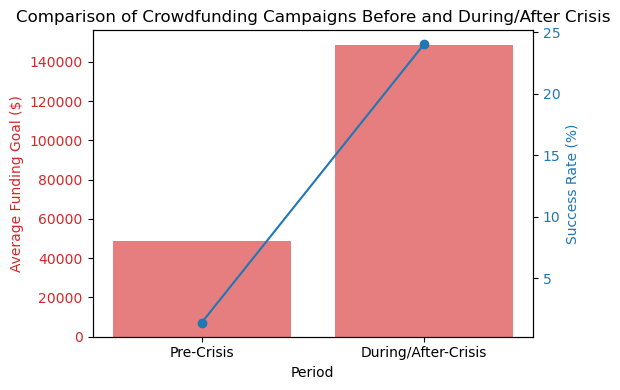

In [47]:
fig, ax1 = plt.subplots(figsize=(6, 4))

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('Average Funding Goal ($)', color=color)
ax1.bar(results['Period'], results['Average Funding Goal'], color=color, alpha=0.6, label='Average Funding Goal ($)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Success Rate (%)', color=color)  
ax2.plot(results['Period'], results['Success Rate'] * 100, color=color, marker='o', label='Success Rate (%)')  # Multiplying by 100 to convert to percentage
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Crowdfunding Campaigns Before and During/After Crisis')
fig.tight_layout()  

plt.show()

### Logit regression

In [48]:
df['success'] = np.where(df['funds_raised_percent'] >= 1, 1, 0)
df['time_period'] = np.where(df['close_date_naive'] < crisis_start_date, 0, 1)
df['funding_goal'] = df['funds_raised_amount'] / df['funds_raised_percent']
df['interaction'] = df['funding_goal'] * df['time_period']

model = logit("success ~ funding_goal + time_period + interaction", data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.297129
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 9273
Model:                          Logit   Df Residuals:                     9269
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.1922
Time:                        12:54:10   Log-Likelihood:                -2755.3
converged:                       True   LL-Null:                       -3410.9
Covariance Type:            nonrobust   LLR p-value:                5.145e-284
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2731      0.127    -33.763      0.000      -4.521      -4.025
funding_goal -2.488e-0

## 3. Duration

In [49]:
df['open_date'] = pd.to_datetime(df['open_date'], errors='coerce', utc=True)
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce', utc=True)
df['duration'] = (df['close_date'] - df['open_date']).dt.days

crisis_start_date = pd.to_datetime('2020-01-01', utc=True)

In [50]:
df['period'] = df['close_date'].apply(lambda x: 'during/after-crisis' if x >= crisis_start_date else 'pre-crisis')

df['success'] = (df['funds_raised_percent'] >= 1).astype(int)

pre_crisis_data = df[df['period'] == 'pre-crisis']
post_crisis_data = df[df['period'] == 'during/after-crisis']

pre_crisis_duration_mean = pre_crisis_data['duration'].mean()
post_crisis_duration_mean = post_crisis_data['duration'].mean()
pre_crisis_success_rate = pre_crisis_data['success'].mean()
post_crisis_success_rate = post_crisis_data['success'].mean()


results = pd.DataFrame({
    "Period": ["Pre-Crisis", "During/After-Crisis"],
    "Average Duration (days)": [pre_crisis_duration_mean, post_crisis_duration_mean],
    "Success Rate": [pre_crisis_success_rate, post_crisis_success_rate]
})

results

,Period,Average Duration (days),Success Rate
0,Pre-Crisis,44.342,0.014
1,During/After-Crisis,41.653,0.240


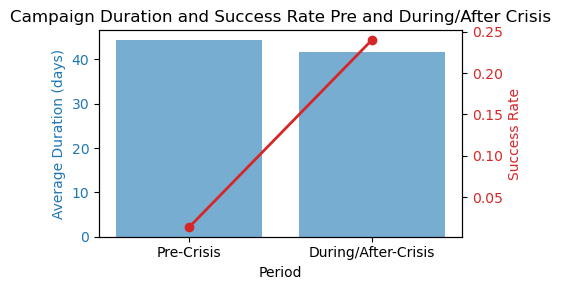

In [51]:
fig, ax1 = plt.subplots(figsize=(5, 3))

color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('Average Duration (days)', color=color)
ax1.bar(results['Period'], results['Average Duration (days)'], color=color, alpha=0.6, label='Average Duration (days)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Success Rate', color=color)  
ax2.plot(results['Period'], results['Success Rate'], color=color, marker='o', linestyle='-', linewidth=2, label='Success Rate')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Campaign Duration and Success Rate Pre and During/After Crisis')
fig.tight_layout()

plt.show()

In [52]:
successful_pre_crisis = pre_crisis_data[pre_crisis_data['funds_raised_percent'] >= 1]
successful_post_crisis = post_crisis_data[post_crisis_data['funds_raised_percent'] >= 1]
t_stat, p_value = ttest_ind(successful_pre_crisis['duration'], successful_post_crisis['duration'], equal_var=False)

t_stat, p_value

(-4.767721419306338, 5.210197698402087e-06)

### logit regression

In [53]:
df['period_numeric'] = df['period'].apply(lambda x: 1 if x == 'during/after-crisis' else 0)

df['duration'].replace([np.inf, -np.inf], np.nan, inplace=True)  
df.dropna(subset=['duration', 'period_numeric'], inplace=True)  

scaler = StandardScaler()
df['scaled_duration'] = scaler.fit_transform(df[['duration']])

df['scaled_duration_crisis_interaction'] = df['scaled_duration'] * df['period_numeric']

X = df[['scaled_duration', 'period_numeric', 'scaled_duration_crisis_interaction']]
y = df['success']

X = sm.add_constant(X)

alpha = 1

model = sm.Logit(y, X).fit_regularized(method='l1', alpha=alpha)

print(model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24864331105705917
            Iterations: 71
            Function evaluations: 71
            Gradient evaluations: 71
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 9293
Model:                          Logit   Df Residuals:                     9289
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                  0.3279
Time:                        12:54:12   Log-Likelihood:                -2294.1
converged:                       True   LL-Null:                       -3413.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------

### Project Category


In [54]:
df['success'] = df['funds_raised_percent'] >= 1

df['open_date'] = pd.to_datetime(df['open_date']).dt.tz_localize(None)
df['close_date'] = pd.to_datetime(df['close_date']).dt.tz_localize(None)

crisis_start_date = pd.to_datetime('2020-01-01').tz_localize(None)


df['period'] = df['close_date'].apply(lambda x: 'during/after-crisis' if x >= crisis_start_date else 'pre-crisis')

category_success_rate = df.groupby(['period', 'category'])['success'].mean().reset_index()

top_categories_pre_crisis = category_success_rate[category_success_rate['period'] == 'pre-crisis'].sort_values(by='success', ascending=False).head(5)
top_categories_during_after_crisis = category_success_rate[category_success_rate['period'] == 'during/after-crisis'].sort_values(by='success', ascending=False).head(5)

top_categories_combined = pd.concat([top_categories_pre_crisis,
                                     top_categories_during_after_crisis])

top_categories_combined.reset_index(drop=True, inplace=True)

top_categories_combined

,period,category,success
0,pre-crisis,Tabletop Games,0.250
1,pre-crisis,Travel & Outdoors,0.207
2,pre-crisis,Home,0.164
3,pre-crisis,Transportation,0.143
4,pre-crisis,Audio,0.111
5,during/after-crisis,Camera Gear,0.929
6,during/after-crisis,Audio,0.812
7,during/after-crisis,Home,0.776
8,during/after-crisis,Phones & Accessories,0.757
9,during/after-crisis,Travel & Outdoors,0.740


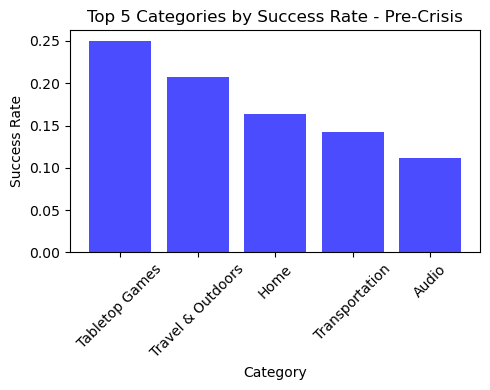

In [55]:
plt.figure(figsize=(5, 4))
plt.bar(top_categories_pre_crisis['category'], top_categories_pre_crisis['success'], color='blue', alpha=0.7)
plt.title('Top 5 Categories by Success Rate - Pre-Crisis')
plt.xlabel('Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

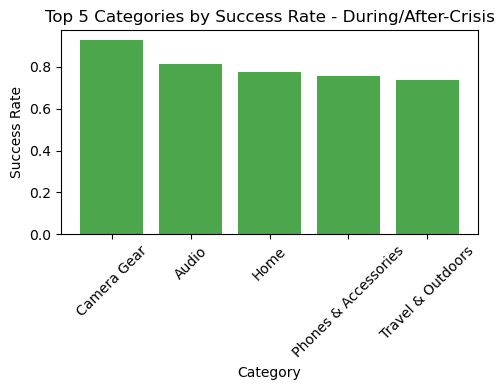

In [56]:
plt.figure(figsize=(5, 4))
plt.bar(top_categories_during_after_crisis['category'], top_categories_during_after_crisis['success'], color='green', alpha=0.7)
plt.title('Top 5 Categories by Success Rate - During/After-Crisis')
plt.xlabel('Category')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### product_stage

In [57]:
df['success'] = df['funds_raised_percent'] >= 1

df['open_date'] = pd.to_datetime(df['open_date']).dt.tz_localize(None)
df['close_date'] = pd.to_datetime(df['close_date']).dt.tz_localize(None)

crisis_start_date = pd.to_datetime('2020-01-01').tz_localize(None)

df['period'] = df['close_date'].apply(lambda x: 'during/after-crisis' if x >= crisis_start_date else 'pre-crisis')

product_stage_success_rate = df.groupby(['period', 'product_stage'])['success'].mean().reset_index()

product_stage_pre_crisis = product_stage_success_rate[product_stage_success_rate['period'] == 'pre-crisis'].sort_values(by='success', ascending=False)
product_stage_during_after_crisis = product_stage_success_rate[product_stage_success_rate['period'] == 'during/after-crisis'].sort_values(by='success', ascending=False)

top_product_stage_combined = pd.concat([product_stage_pre_crisis,
                                     product_stage_during_after_crisis])

top_product_stage_combined.reset_index(drop=True, inplace=True)

top_product_stage_combined

,period,product_stage,success
0,pre-crisis,shipping,1.000
1,pre-crisis,prototype,0.083
2,pre-crisis,concept,0.011
3,pre-crisis,production,0.000
4,during/after-crisis,shipping,0.982
5,during/after-crisis,production,0.875
6,during/after-crisis,prototype,0.697
7,during/after-crisis,concept,0.180


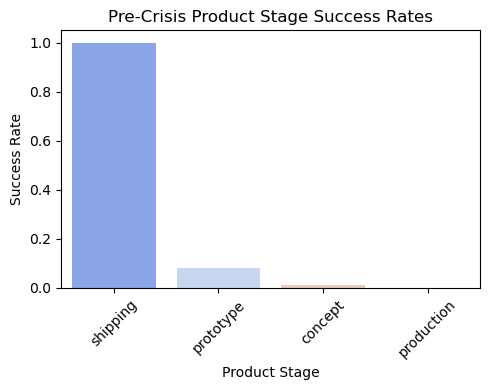

In [58]:
plt.figure(figsize=(5, 4))
sns.barplot(x='product_stage', y='success', data=product_stage_pre_crisis, errorbar=None, palette='coolwarm')
plt.title('Pre-Crisis Product Stage Success Rates')
plt.xlabel('Product Stage')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

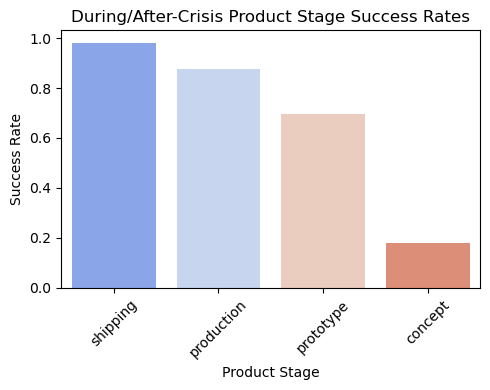

In [59]:
plt.figure(figsize=(5, 4))
sns.barplot(x='product_stage', y='success', data=product_stage_during_after_crisis, errorbar=None, palette='coolwarm')
plt.title('During/After-Crisis Product Stage Success Rates')
plt.xlabel('Product Stage')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [60]:
contingency_before = pd.crosstab(df[df['close_date'] < crisis_start_date]['product_stage'],
                                 df[df['close_date'] < crisis_start_date]['success'])

contingency_during_after = pd.crosstab(df[df['close_date'] >= crisis_start_date]['product_stage'],
                                       df[df['close_date'] >= crisis_start_date]['success'])

chi2_before, p_before, _, _ = chi2_contingency(contingency_before)
chi2_during_after, p_during_after, _, _ = chi2_contingency(contingency_during_after)

print("Chi-square Test Before Crisis:")
print(f"Chi2 Statistic: {chi2_before}, P-value: {p_before}\n")

print("Chi-square Test During/After Crisis:")
print(f"Chi2 Statistic: {chi2_during_after}, P-value: {p_during_after}")


Chi-square Test Before Crisis:
Chi2 Statistic: 97.48595505617978, P-value: 5.395022418679845e-21

Chi-square Test During/After Crisis:
Chi2 Statistic: 154.92473396063332, P-value: 2.2819100322358095e-33
